Question-1: Clustering

Ploting a scatter plot of this data with market cap and volume as the axes 

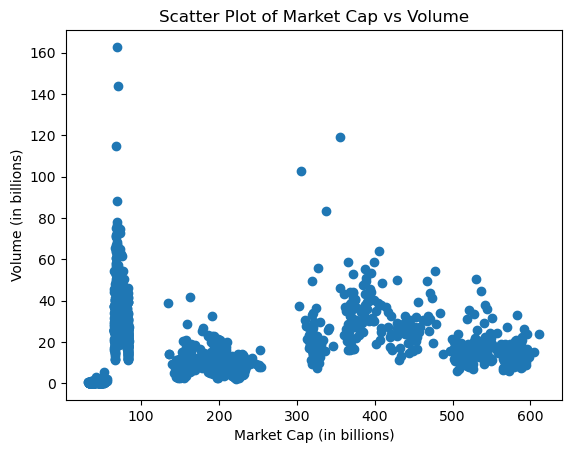

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Q1_data.csv")

# Create the scatter plot of all data
plt.scatter(data["market_cap"]/1e9, data["volume"]/1e9)
plt.xlabel("Market Cap (in billions)")
plt.ylabel("Volume (in billions)")
plt.title("Scatter Plot of Market Cap vs Volume")
plt.show()


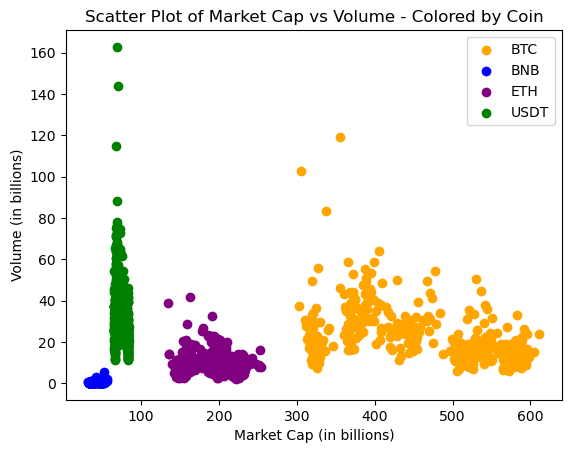

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot which each coin's data have same color
coin_colors = {
    "BTC": "orange",
    "BNB": "blue",
    "ETH": "purple",
    "USDT": "green"
}
for coin in coin_colors:
    coin_data = data[data["symbol"] == coin]
    plt.scatter(coin_data["market_cap"]/1e9, coin_data["volume"]/1e9, color=coin_colors[coin], label=coin)
plt.xlabel("Market Cap (in billions)")
plt.ylabel("Volume (in billions)")
plt.title("Scatter Plot of Market Cap vs Volume - Colored by Coin")
plt.legend()
plt.show()

Part1: Executing the K-means clustering algorithm solely based on two features: market cap and volume, with 5 clusters for this dataset

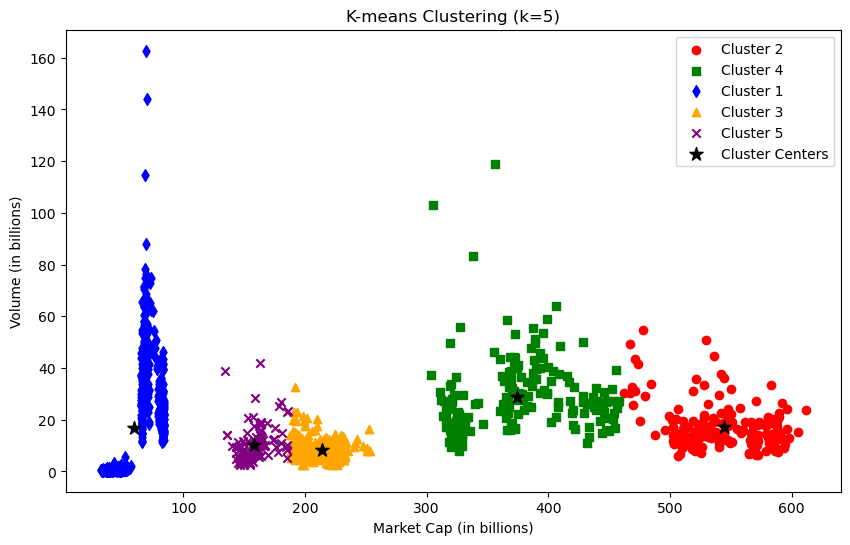

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Q1_data.csv')

# Extract the features for clustering
X = df[['market_cap', 'volume']]/1e9

# Fit the K-means algorithm with five clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X)

df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
clusters = df['cluster'].unique()
colors = ['red', 'green', 'blue', 'orange', 'purple']
markers = ['o', 's', 'd', '^', 'x']

for cluster, color, marker in zip(clusters, colors, markers):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['market_cap']/1e9, cluster_data['volume']/1e9, color=color, marker=marker, label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='*', s=100, label='Cluster Centers')

plt.xlabel("Market Cap (in billions)")
plt.ylabel("Volume (in billions)")
plt.title('K-means Clustering (k=5)')
plt.legend()
plt.show()

Part2: Runnig the K-means algorithm for values of k ranging from 1 to 10, and choosing an appropriate value for the hyperparameter k by calculating the Within-Cluster Sum of Squares

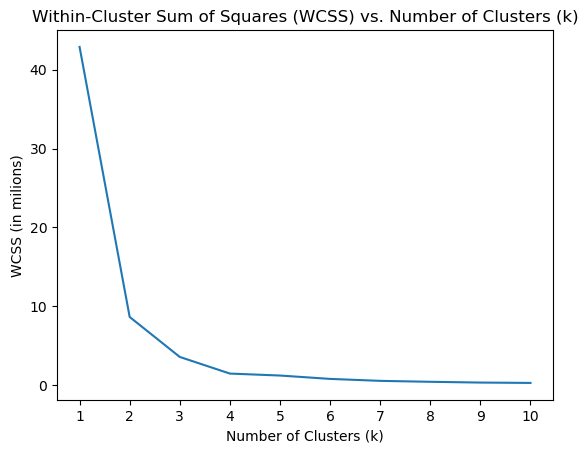

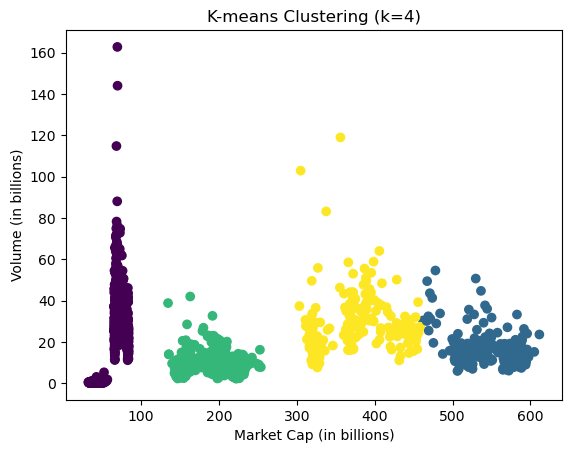

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume,cluster
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10,1
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09,1
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10,3
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10,1
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1451,BTC,Bitcoin,2022-11-07T23:59:59.999Z,2022-11-07T02:18:00.000Z,2022-11-07T22:33:00.000Z,20924.620484,20602.816725,21053.246150,20489.973344,3.955964e+11,5.351085e+10,3
1452,1452,BNB,BNB,2022-12-24T23:59:59.999Z,2022-12-24T00:02:00.000Z,2022-12-24T12:32:00.000Z,246.151646,244.635529,246.181715,243.953043,3.913335e+10,2.806274e+08,0
1453,1453,ETH,Ethereum,2023-04-18T23:59:59.999Z,2023-04-18T11:51:00.000Z,2023-04-18T01:16:00.000Z,2075.855262,2104.537267,2121.531519,2057.653862,2.512149e+11,9.134015e+09,2
1454,1454,ETH,Ethereum,2022-10-18T23:59:59.999Z,2022-10-18T00:35:00.000Z,2022-10-18T19:17:00.000Z,1331.669921,1310.447037,1339.085967,1291.660699,1.603645e+11,1.041675e+10,2


In [112]:
df = pd.read_csv('Q1_data.csv')

# Extract the features for clustering
X = df[['market_cap', 'volume']]/1e9

# Calculate WCSS for different values of k
wcss = []
k_values = range(1, 11)  # Range of k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init = 'auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_/1e6)

# Plot the WCSS values for different k values
plt.plot(k_values, wcss)
plt.title('Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.xticks(k_values)
plt.ylabel('WCSS (in milions)')
plt.show()

# Choosing the appropriate value of k, based on the "elbow method", we select the value of k where the decrease in WCSS starts to level off
# It indicates the point where adding more clusters does not significantly improve the model
# In this case, we choose k=4

k_chosen = 4

# Run K-means with the chosen value of k=4
kmeans_chosen = KMeans(n_clusters=k_chosen, n_init = 'auto')
kmeans_chosen.fit(X)

# Get the cluster labels for each data point
labels = kmeans_chosen.labels_

# Add the cluster labels to the original dataset
df['cluster'] = labels

# Plot the clusters
plt.scatter(df["market_cap"]/1e9, df["volume"]/1e9, c=df['cluster'])
plt.xlabel("Market Cap (in billions)")
plt.ylabel("Volume (in billions)")
plt.title('K-means Clustering (k=4)')
plt.show()

# Display the dataset with cluster labels column
df
